In [80]:
#Importing the Pandas Library
import pandas as pd

In [81]:
#Reading the Dataset and Displaying the Index Values of the Dataset
data = pd.read_csv("Insurance.csv")
print(data.index)

RangeIndex(start=0, stop=1338, step=1)


In [82]:
#Displaying the List of Columns Present in the Dataset, Number of Rows x Number of Columns Present in the Dataset
#, and the Information of the Dataset
print(data.columns)
print(data.shape)
data.info()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [83]:
#Displaying the First Five Values of the Dataset
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [84]:
#Displaying the Last Five Values of the Dataset
print(data.tail())

      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [85]:
#Calculating the Count of Unique Values For Each Column
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [86]:
#Calculating the Count of NA Values Present in the Dataset
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [87]:
#Calculating the Count of NULL Values Present in the Dataset
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [88]:
#Displaying the Description of the Data Stored in the DataFrame
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [89]:
#Displaying the Data Types of All Columns in the Data Set
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [90]:
#Using the 'describe()' with specific percentiles
pd.DataFrame(data['age']).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
1%,18.000000
10%,19.000000
30%,29.000000
50%,39.000000
75%,51.000000
90%,59.000000


In [91]:
#Importing the MatPlot Library
import matplotlib.pyplot as plt

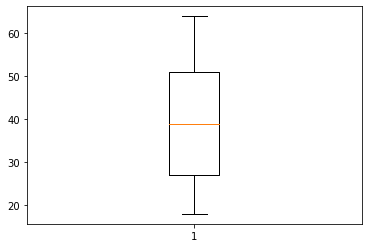

In [92]:
#Plotting a Box-Plot Graph For 'age' column To Find The Presence of Outliers
%matplotlib inline
plt.boxplot(data['age'])
plt.show()

In [93]:
#Checking Outliers By Definition And Treating Outliers

#Finding the Median 'age'
age_col_df = pd.DataFrame(data['age'])
age_median = age_col_df.median()

#Calculating the Inter-Quartile Range of the 'age' column
Q1 = age_col_df.quantile(q=0.25)
Q3 = age_col_df.quantile(q=0.75) 
IQR = Q3 - Q1

IQR_LL = int(Q1 - 1.5*IQR) #Calculating the Value For The Lower Level Outlier
IQR_UL = int(Q3 + 1.5*IQR) #Calculating the Value For The Upper Level Outlier

#Finding And Treating the Outliers At Upper Level And Lower Level
data.loc[data['age'] > IQR_UL , 'age'] == int(age_col_df.quantile(q=0.90))
data.loc[data['age'] < IQR_LL , 'age'] == int(age_col_df.quantile(q=0.01))

Series([], Name: age, dtype: bool)

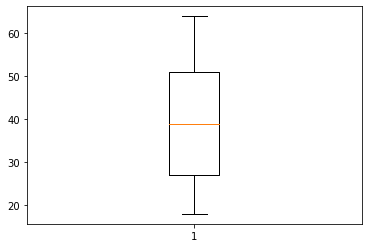

In [94]:
#Checking the Maximum Value of the 'age' Column To See If There Are Any Changes
max(data['age'])
plt.boxplot(data['age'])
plt.show()

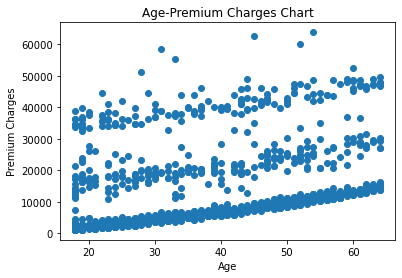

In [95]:
#Plotting A Scatter-Plot Graph To See How 'age' Is Varying With Insurance Premium 'charges'
x = data['age']
y = data['charges']
plt.scatter(x, y)
plt.title("Age-Premium Charges Chart")
plt.xlabel('Age')
plt.ylabel('Premium Charges')
plt.show()

In [96]:
#Importing the Seaborn Library
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

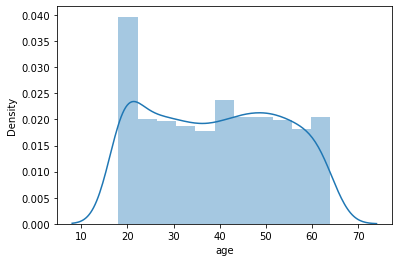

In [97]:
#Plotting A Density Distribution Graph Against The Data Distribution of 'age' Column
sns.distplot(data['age'])

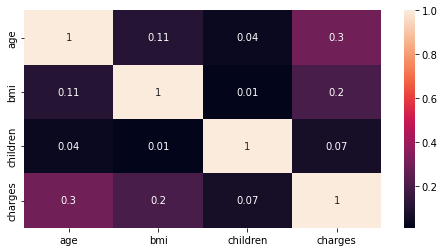

In [98]:
#Finding The Pairwise Correlation Of All Numeric Columns And Plotting HeatMap Graphs For Each Pairwise Collection
#Of The Columns
corr_matrix = data.corr().round(2)
figure, axis = plt.subplots(figsize =(8,4))
c = sns.heatmap(data=corr_matrix, annot=True)
figure.savefig("myimage.png")

In [99]:
#Reading The Updated Dataset Filled With Numeric Values
my_data = pd.read_csv("Insurance_Numeric.csv")
my_data

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830
1334,18,31.920,0,0,2205.98080
1335,18,36.850,0,0,1629.83350
1336,21,25.800,0,0,2007.94500


In [100]:
#Performing the Normalization of Data - Scaling the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(my_data)
scaled_data

#Converting The Scaled Data Into A Pandas DataFrame
my_data_scaled = pd.DataFrame(scaled_data)
my_data_scaled.columns = my_data.columns

#Separating Features - 'age','smoker' And Response - 'charges'
features = ["age", "smoker"]
response = ["charges"]
x = my_data_scaled[features]
y = my_data_scaled[response]

In [101]:
#Importing Necessary Packages to Perform Linear Regression
#And To Divide the Data Into Training and Testing Data
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Fitting The Linear Regression Model
model = LinearRegression()
model.fit(x_train, y_train)

#Finding The Accuracy of the Predicted Data By Comparing With The Test Data
accuracy = model.score(x_test, y_test)
print(accuracy*100,'%')

77.25859533422103 %


In [102]:
#Storing the Predicted Value Into A Pandas DataFrame
y_pred = model.predict(x_test)

#Calculating the R2-Score and Mean Squared Error Between Predicted Values and Testing Values
print("R2-Score: ", metrics.r2_score(y_pred, y_test))
print("MSE : ", metrics.mean_squared_error(y_pred, y_test))

R2-Score:  0.6728681108287512
MSE :  0.009220344369196935


In [103]:
x_test #Displaying the Testing Data of the 'Features' DataFrame

,age,smoker
578,0.739130,0.0
610,0.630435,0.0
569,0.652174,1.0
1034,0.934783,0.0
198,0.717391,0.0
...,...,...
1084,0.956522,0.0
726,0.500000,0.0
1132,0.847826,0.0
725,0.260870,1.0


In [104]:
y_test #Displaying the Testing Data of the 'Responses' DataFrame

,charges
578,0.137316
610,0.118531
569,0.711591
1034,0.188802
198,0.136035
...,...
1084,0.221839
726,0.088475
1132,0.312651
725,0.635458


In [105]:
y_pred #Displaying The Predicted Values of the 'Responses' DataFrame

array([[0.17206132],
       [0.15028948],
       [0.53064532],
       [0.21125064],
       [0.16770695],
       [0.09368268],
       [0.02401277],
       [0.16770695],
       [0.11110015],
       [0.08061957],
       [0.09368268],
       [0.16335258],
       [0.132872  ],
       [0.08932831],
       [0.43920357],
       [0.16335258],
       [0.20689628],
       [0.05884772],
       [0.11110015],
       [0.40872298],
       [0.54370843],
       [0.1894788 ],
       [0.17206132],
       [0.52629095],
       [0.04143025],
       [0.08497394],
       [0.06755646],
       [0.11980889],
       [0.08061957],
       [0.14158074],
       [0.11980889],
       [0.57854338],
       [0.21560501],
       [0.18512443],
       [0.42614046],
       [0.0762652 ],
       [0.14593511],
       [0.44355794],
       [0.49581037],
       [0.03272151],
       [0.10239142],
       [0.07191083],
       [0.491456  ],
       [0.57418901],
       [0.40001425],
       [0.03707588],
       [0.16335258],
       [0.128

In [106]:
print(model.intercept_) #Checking The Intercept of the Linear Regression Model Equation
print(model.coef_) #Checking The Coefficient of the Linear Regression Model Equation

[0.02401277]
[[0.20030098 0.37600148]]


In [107]:
scaled_data = scaler.fit_transform([[0, 60000]])
print(model.predict(scaled_data))

[[0.02401277]]


In [108]:
yd_test = [10,20,30]
yd_pred = [10,20,30]
metrics.r2_score(yd_test, yd_pred)

1.0